In [478]:
%pylab inline
import homer
import glob
import pandas as pd
import importlib

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [417]:
homer.clusterer = importlib.reload(homer.clusterer)
homer.transition = importlib.reload(homer.transition)

In [491]:
homer.tree = importlib.reload(homer.tree)

In [2]:
tw_files='/Users/houghton/Desktop/tw/posts_sample_201506*.gz'    

In [5]:
wel_files = homer.build_weighted_edgelist_db(
    tw_file_globstring='/Users/houghton/Desktop/tw/posts*', 
    intermediate_files_globstring='/Users/houghton/Desktop/tw/hashtags_only/parsing/hashtags_int_*.csv',
    output_files_globstring='/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel_*.csv',
    languages=['en'],
    dates=[20150616, 20150617, 20150618, 20150619, 20150620, 20150621, 20150622, 20150623, 20160624],
    threshold=2,
    hashtags_only=True
    )

[########################################] | 100% Completed | 34min 10.9s
[########################################] | 100% Completed |  2min  7.2s


In [105]:
wel_files = glob.glob('/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel*.csv')
wel_files

['/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel_20150616.csv',
 '/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel_20150617.csv',
 '/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel_20150618.csv',
 '/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel_20150619.csv',
 '/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel_20150620.csv',
 '/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel_20150621.csv',
 '/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel_20150622.csv',
 '/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel_20150623.csv',
 '/Users/houghton/Desktop/tw/hashtags_only/hashtag_wel_20160624.csv']

In [4]:
assert len(wel_files) == len([20150616, 20150617, 20150618, 20150619, 20150620, 20150621, 20150622, 20150623, 20160624])

In [5]:
cluster_files = homer.build_cluster_db(
    weighted_edge_list_files=sorted(wel_files)[:-1],
    intermediate_files_directory='/Users/houghton/Desktop/tw/hashtags_only/cos_working',
    output_files_directory='/Users/houghton/Desktop/tw/hashtags_only/cos_output',
    dates=[20150616, 20150617, 20150618, 20150619, 20150620, 20150621, 20150622, 20150623],
    thresholds=[2]
)

In [119]:
inter_day_cluster_files = homer.clusterer.build_transition_cluster_db(
    weighted_edge_list_files=sorted(wel_files)[:-1],
    intermediate_files_directory='/Users/houghton/Desktop/tw/hashtags_only/cos_working_tr',
    output_files_directory='/Users/houghton/Desktop/tw/hashtags_only/cos_output_tr',
    dates=[20150616, 20150617, 20150618, 20150619, 20150620, 20150621, 20150622, 20150623],
    thresholds=[2]
)

In [125]:
inter_day_cluster_files = cluster_files

In [126]:
inter_day_cluster_files_df = pd.DataFrame(inter_day_cluster_files)
inter_day_cluster_files_df['k'] = inter_day_cluster_files_df['k'].apply(int)
inter_day_cluster_files_df.head()

,date,file,k,threshold
0,20150616_20150617,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,10,2
1,20150616_20150617,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,11,2
2,20150616_20150617,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,12,2
3,20150616_20150617,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,13,2
4,20150616_20150617,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,14,2


In [11]:
cluster_files_df = pd.DataFrame(cluster_files)
cluster_files_df['k'] = cluster_files_df['k'].apply(int)
cluster_files_df.head()

,date,file,k,threshold
0,20150616,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,10,2
1,20150616,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,11,2
2,20150616,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,12,2
3,20150616,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,13,2
4,20150616,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,14,2


In [43]:
output_files_directory='/Users/houghton/Desktop/tw/hashtags_only/cos_output'
collector = []
for date_dir in glob.glob(output_files_directory+'/*'):
    date = date_dir.split('/')[-1]
    for th_dir in glob.glob(date_dir+'/*'):
        th = th_dir.split('/')[-1]
        for cluster_file in glob.glob(th_dir+'/*.csv'):
            k = int(cluster_file.split('/')[-1].split('_')[0])
            collector.append({'date':date, 'threshold':th, 'k':k, 'file':cluster_file})
            
cluster_files_df = pd.DataFrame(collector)
cluster_files_df.head()

,date,file,k,threshold
0,20150616,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,10,2
1,20150616,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,11,2
2,20150616,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,12,2
3,20150616,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,13,2
4,20150616,/Users/houghton/Desktop/tw/hashtags_only/cos_o...,14,2


In [44]:
Cluster = homer.tree.Cluster

In [45]:
#populate tree with nodes
root = Cluster('__root__')
for _, row in cluster_files_df.iterrows():
    clusters = pd.read_csv(row['file'], header=None, names=['ID', 'set'])
    for _, cluster in clusters.iterrows():
        new = Cluster(contents=cluster['ID'],
                  k=row['k'],
                  w=row['threshold'],
                  date=row['date'])
        root.insert(new)
        if row['k'] == 3:
            root.k_children.append(new)


In [46]:
root.left

__20150616_10_2_2

In [47]:
def find_k_children(parent_file, child_file):
    parents = pd.read_csv(parent_file, header=None, names=['ID', 'set'], index_col=['ID'])
    parents['set'] = parents['set'].apply(lambda x: set(x.split(' ')))
    child_candidates = pd.read_csv(child_file, header=None, names=['ID', 'set'], index_col=['ID'])
    child_candidates['set'] = child_candidates['set'].apply(lambda x: set(x.split(' ')))

    collector = []
    for parent_id, parent in parents.iterrows():
        children = [child_id for child_id, child in child_candidates.iterrows() if
                    child['set'].issubset(parent['set'])]
        if len(children) > 0:
            collector.append({'ID': parent_id,
                              'children': children})

    return collector


def build_day(cluster_files_df):
    current_group = cluster_files_df.sort(columns='k').reset_index(drop=True)
    collector = []
    for ia, ib in zip(current_group.index[:-1], current_group.index[1:]):
        collector = collector + find_k_children(current_group['file'].loc[ia],
                                                current_group['file'].loc[ib])
    return collector
    
    

In [48]:
for (date, threshold), group in cluster_files_df.groupby(by=['date', 'threshold']):
    print(date, threshold)
    for element in build_day(group):
        print('.', end='')
        node = root.find(element['ID'])
        for child in element['children']:
            node.k_children.append(root.find(child))

20150616 2


/Users/houghton/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
# iterate through files, starting with the highest k, working to lower k
# for each cluster in the file, find its cluster in the tree, and poll for members,
# add leaves for missing members

In [57]:
# add leaves

for _, row in cluster_files_df.sort('k', ascending=False).iterrows():
    print(row)
    clusters = pd.read_csv(row['file'], header=None, names=['ID', 'set'])
    for _, cluster in clusters.iterrows():
        node = root.find(cluster['ID'])
        present_in_children = [m.contents for m in node.get_k_members()]
        words = cluster['set'].split(' ')
        for leaf_word in list(set(words) - set(present_in_children)):
                leaf = root.find(leaf_word)
                if leaf is None:
                    leaf = Cluster(leaf_word, is_leaf=True)
                    root.insert(leaf)
                node.k_children.append(leaf)


/Users/houghton/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


date                                                  20150618
file         /Users/houghton/Desktop/tw/hashtags_only/cos_o...
k                                                           18
threshold                                                    2
Name: 37, dtype: object
date                                                  20150621
file         /Users/houghton/Desktop/tw/hashtags_only/cos_o...
k                                                           18
threshold                                                    2
Name: 85, dtype: object
date                                                  20150619
file         /Users/houghton/Desktop/tw/hashtags_only/cos_o...
k                                                           18
threshold                                                    2
Name: 53, dtype: object
date                                                  20150620
file         /Users/houghton/Desktop/tw/hashtags_only/cos_o...
k                                             

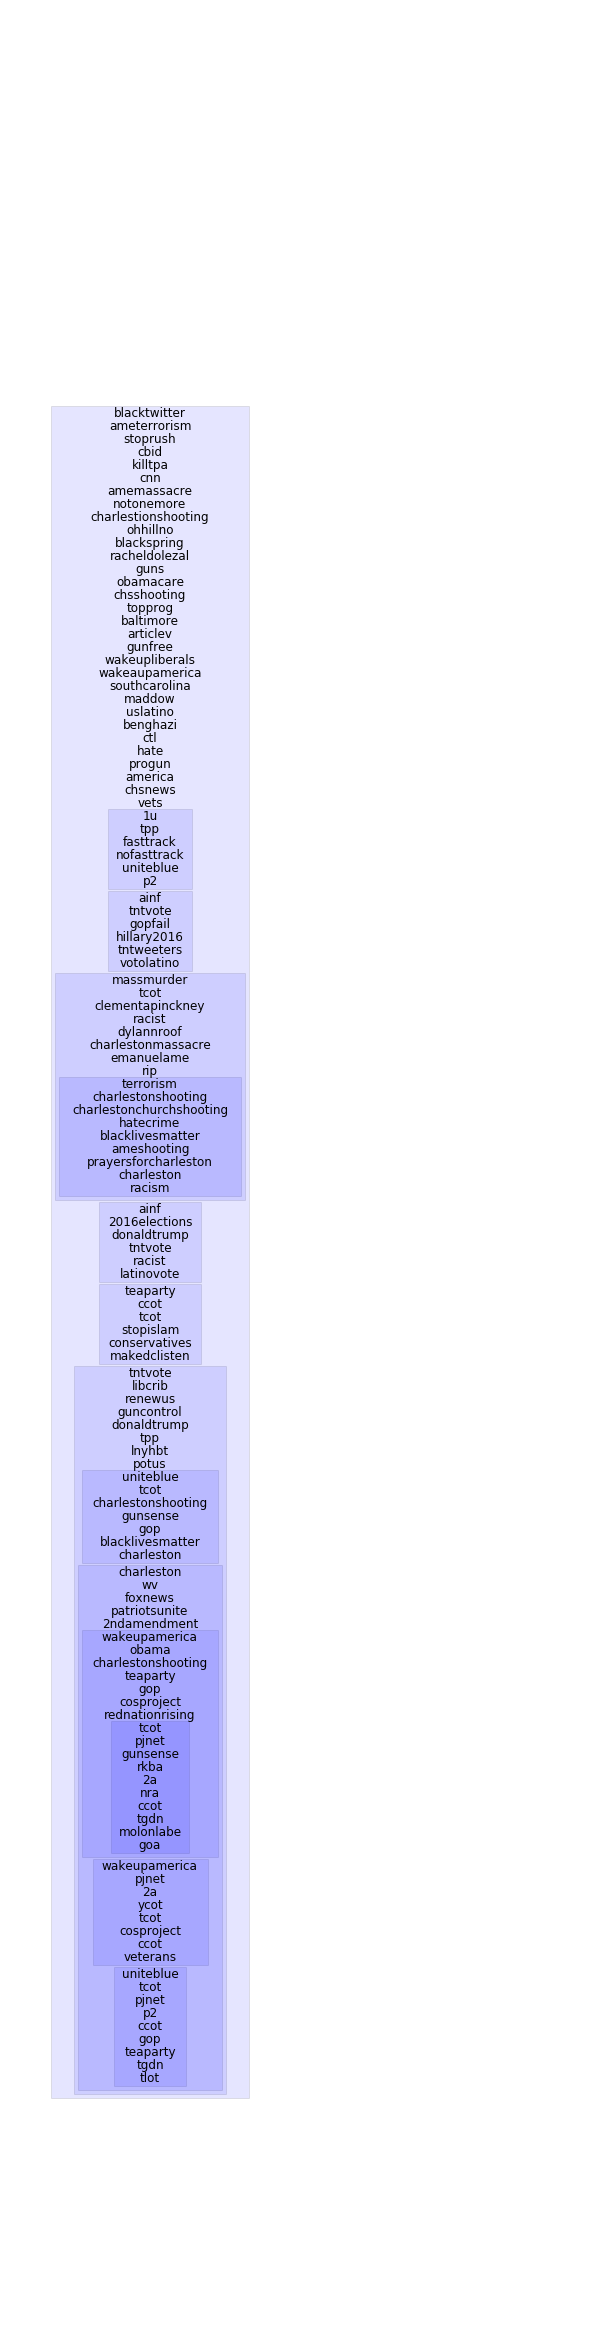

In [160]:
a = root.find('__20150618_5_2_27')
fig = plt.figure(figsize=(10,40))
ax = fig.gca()

a.draw(ax, center=150, bottom=250)

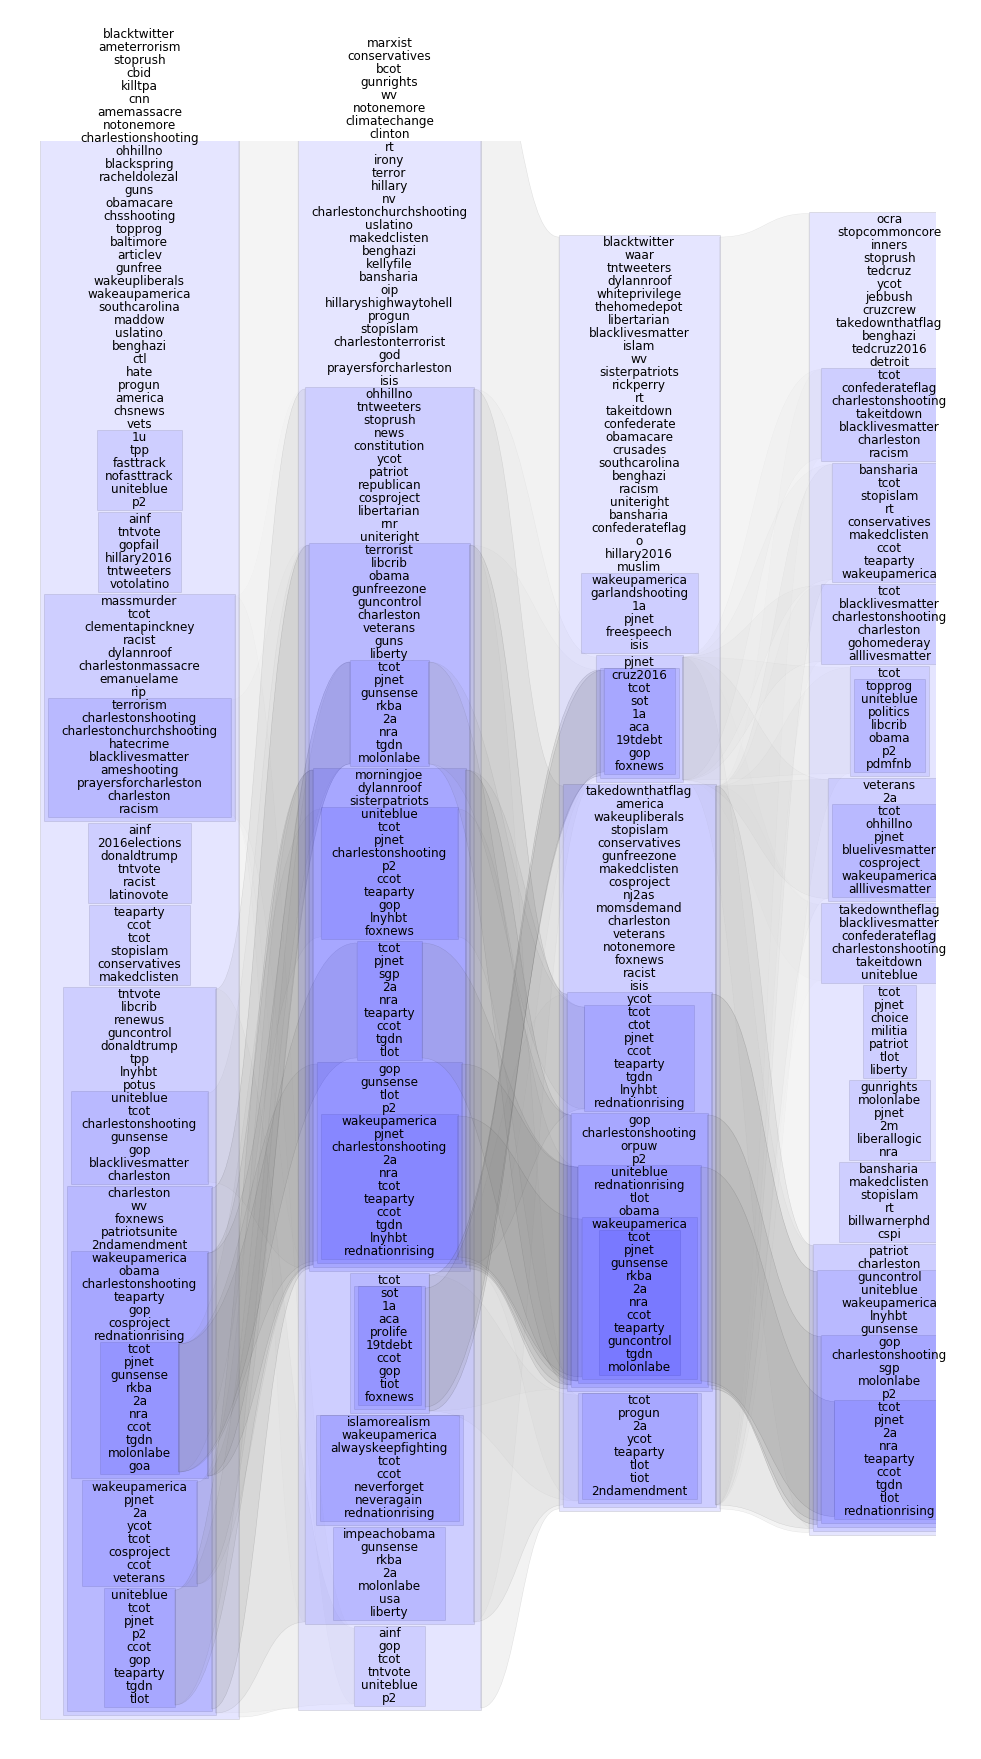

In [186]:
homer.tree.draw_series(a, 3, spacing=250)

In [128]:
daily_clusters = dask.dataframe.read_csv(list(cluster_files_df['file']), header=None, names=['ID', 'set']).compute()

In [151]:
daily_clusters['k'] = daily_clusters['ID'].apply(lambda x: int(x.split('_')[-3]))
daily_clusters['threshold'] = daily_clusters['ID'].apply(lambda x: int(x.split('_')[-2]))
daily_clusters['Date'] = daily_clusters['ID'].apply(lambda x: int(x.split('_')[-4]))

In [152]:
daily_clusters.head()

,ID,set,k,threshold,Date
0,__20150616_10_2_2,summer actor bobbyjohnson fun muscle sixpack ...,10,2,20150616
1,__20150616_10_2_1,followpyramid autorefollow rt followback sigu...,10,2,20150616
2,__20150616_10_2_22,baby turkey sex chick blond threesome lesbian...,10,2,20150616
3,__20150616_10_2_12,fantasy mystery romance kindle ian1 ebooks sc...,10,2,20150616
4,__20150616_10_2_28,funk dance hiphop soul chat nowplaying reggae...,10,2,20150616


In [129]:
inter_day_clusters = dask.dataframe.read_csv(list(inter_day_cluster_files_df['file']), header=None, names=['ID', 'set']).compute()

In [147]:
inter_day_clusters['k'] = inter_day_clusters['ID'].apply(lambda x: int(x.split('_')[-3]))
inter_day_clusters['threshold'] = inter_day_clusters['ID'].apply(lambda x: int(x.split('_')[-2]))
inter_day_clusters['Date_1'] = inter_day_clusters['ID'].apply(lambda x: int(x.split('_')[-5]))
inter_day_clusters['Date_2'] = inter_day_clusters['ID'].apply(lambda x: int(x.split('_')[-4]))

In [148]:
inter_day_clusters.head()

,ID,set,k,threshold,Date_1,Date_2
0,__20150616_20150617_10_2_75,usdchf news money follow eurusd binary ff usd...,10,2,20150616,20150617
1,__20150616_20150617_10_2_42,mh17 paris london donetsk auspol berlin ziona...,10,2,20150616,20150617
2,__20150616_20150617_10_2_8,99cents bookboost mystery amwriting tw4rw byn...,10,2,20150616,20150617
3,__20150616_20150617_10_2_20,ｶﾊﾞｰ iphone6plus leather ｹｰｽ ファッション goldmedus...,10,2,20150616,20150617
4,__20150616_20150617_10_2_29,100aday f4f gainbot followme 500aday ifollowb...,10,2,20150616,20150617


In [178]:
transition_list = homer.transition.compute_transition_list(daily_clusters, inter_day_clusters,
                                                           '/Users/houghton/Desktop/tw/hashtags_only/transitions.csv')

[########################################] | 100% Completed |  2hr 30min 55.7s


In [179]:
transition_list.head()

,C1,C2,similarity
0,__20150616_10_2_12,__20150617_10_2_44,0.476190
1,__20150616_10_2_12,__20150617_10_2_43,0.521739
2,__20150616_10_2_12,__20150617_10_2_21,0.565217
0,__20150616_10_2_10,__20150617_10_2_18,0.857143
0,__20150616_10_2_6,__20150617_10_2_31,0.769231


In [181]:
# add connections to subsequent day clusters
for i, (c1, c2, similarity) in transition_list.iterrows():
    n1 = root.find(c1)
    n2 = root.find(c2)
    n1.tomorrow.append(n2)
    n1.p_tomorrow.append(similarity)


In [182]:
for node in homer.tree.walk_tree(root):
    node.k_parents = []

In [183]:
for node in homer.tree.walk_tree(root):
    for child in node.k_children:
        child.k_parents.append(node)
    

In [184]:
import gzip
tree_filename = '/Users/houghton/Desktop/tw/hashtags_only/tree1.json.gz'
with gzip.open(tree_filename, 'wb') as f:
        for node in homer.tree.walk_tree(root):
            f.write((node.to_json() + '\n').encode())

In [438]:
def draw(self, ax, center, bottom, highlight_words={}):
    if self.height is None or self.width is None or self.child_bottoms is None:
        self.compute_size()

    if self.is_leaf:
        if self.contents in highlight_words:
            self.text_properties['color'] = highlight_words[self.contents]
        else:
            self.text_properties['color'] = 'k'
            
        ax.text(center, bottom, self.contents,
                transform=None, **self.text_properties)
    else:
        [child.draw(ax, center, bottom + child_bottom, highlight_words)
         for child, child_bottom in zip(self.k_children, self.child_bottoms)]
        ax.add_patch(plt.Rectangle((center - .5 * self.width, bottom),
                                   self.width, self.height - self.pts_buffer / 2,
                                   alpha=.1, transform=None))
    ax.set_axis_off()
    
import types
for node in homer.tree.walk_tree(root):
    node.draw = types.MethodType( draw, node )

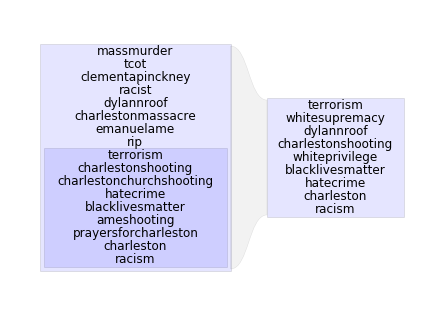

In [330]:
a = root.find('__20150618_7_2_188').k_parents[0]
homer.tree.draw_series(a, 1, spacing=200)

In [1]:
1346789
25

17+9-7

19 words total, 7 overlap

terrorism, dylannroof, charlestonshooting, etc...

NameError: name 'root' is not defined

In [2]:
7/19

0.3684210526315789

In [356]:
n = root.find('charleston')
for p in n.k_parents:
    print(p, end='\t')
    for i in range(10):
        try:
            print(len(list(p.get_k_members())), end='\t')
            p = p.k_parents[0]
        except:
            print('')
            break

__20150616_4_2_0	5845	10022	129227	
__20150617_5_2_0	3383	5786	9906	129227	
__20150618_3_2_764	4	129227	
__20150618_4_2_483	5	9369	129227	
__20150618_4_2_488	5	9369	129227	
__20150618_4_2_613	6	9369	129227	
__20150618_5_2_0	3118	5298	9369	129227	
__20150618_5_2_399	6	6	9369	129227	
__20150618_5_2_527	6	6	9369	129227	
__20150618_5_2_584	6	5298	9369	129227	
__20150618_5_2_587	6	5298	9369	129227	
__20150618_7_2_188	10	18	135	5298	9369	129227	
__20150618_7_2_207	8	58	135	5298	9369	129227	
__20150618_7_2_61	42	58	135	5298	9369	129227	
__20150619_3_2_910	4	129227	
__20150619_3_2_912	4	129227	
__20150619_3_2_913	4	129227	
__20150619_5_2_290	6	5897	9598	129227	
__20150619_5_2_492	6	5897	9598	129227	
__20150619_5_2_573	6	5897	9598	129227	
__20150619_6_2_345	10	23	5897	9598	129227	
__20150619_6_2_355	7	23	5897	9598	129227	
__20150619_7_2_33	58	98	132	5897	9598	129227	
__20150620_3_2_705	4	129227	
__20150620_3_2_711	4	129227	
__20150620_4_2_562	5	8944	129227	
__20150620_6_2_3	56	99	5190	8944	1292

In [357]:
n = root.find('charlestonshooting')
for p in n.k_parents:
    print(p, end='\t')
    for i in range(10):
        try:
            print(len(list(p.get_k_members())), end='\t')
            p = p.k_parents[0]
        except:
            print('')
            break

__20150618_3_2_1242	4	129227	
__20150618_3_2_279	6	129227	
__20150618_3_2_678	4	129227	
__20150618_3_2_766	4	129227	
__20150618_4_2_483	5	9369	129227	
__20150618_4_2_488	5	9369	129227	
__20150618_4_2_613	6	9369	129227	
__20150618_4_2_851	5	9369	129227	
__20150618_4_2_882	5	9369	129227	
__20150618_5_2_312	6	5298	9369	129227	
__20150618_5_2_459	6	5298	9369	129227	
__20150618_5_2_584	6	5298	9369	129227	
__20150618_5_2_8	45	5298	9369	129227	
__20150618_7_2_188	10	18	135	5298	9369	129227	
__20150618_7_2_207	8	58	135	5298	9369	129227	
__20150618_8_2_70	18	42	58	135	5298	9369	129227	
__20150619_10_2_45	12	16	40	58	98	132	5897	9598	129227	
__20150619_3_2_591	4	129227	
__20150619_3_2_615	4	129227	
__20150619_3_2_863	4	129227	
__20150619_3_2_914	4	129227	
__20150619_3_2_915	4	129227	
__20150619_4_2_48	12	9598	129227	
__20150619_4_2_488	5	9598	129227	
__20150619_4_2_587	5	9598	129227	
__20150619_5_2_0	3453	5897	9598	129227	
__20150619_5_2_293	6	6	9598	129227	
__20150619_5_2_487	6	5897	9598	129227

In [492]:
for node in homer.tree.walk_tree(root):
    try:
        node.k_children = node.k_children_orig
    except:
        pass
    node.width=None

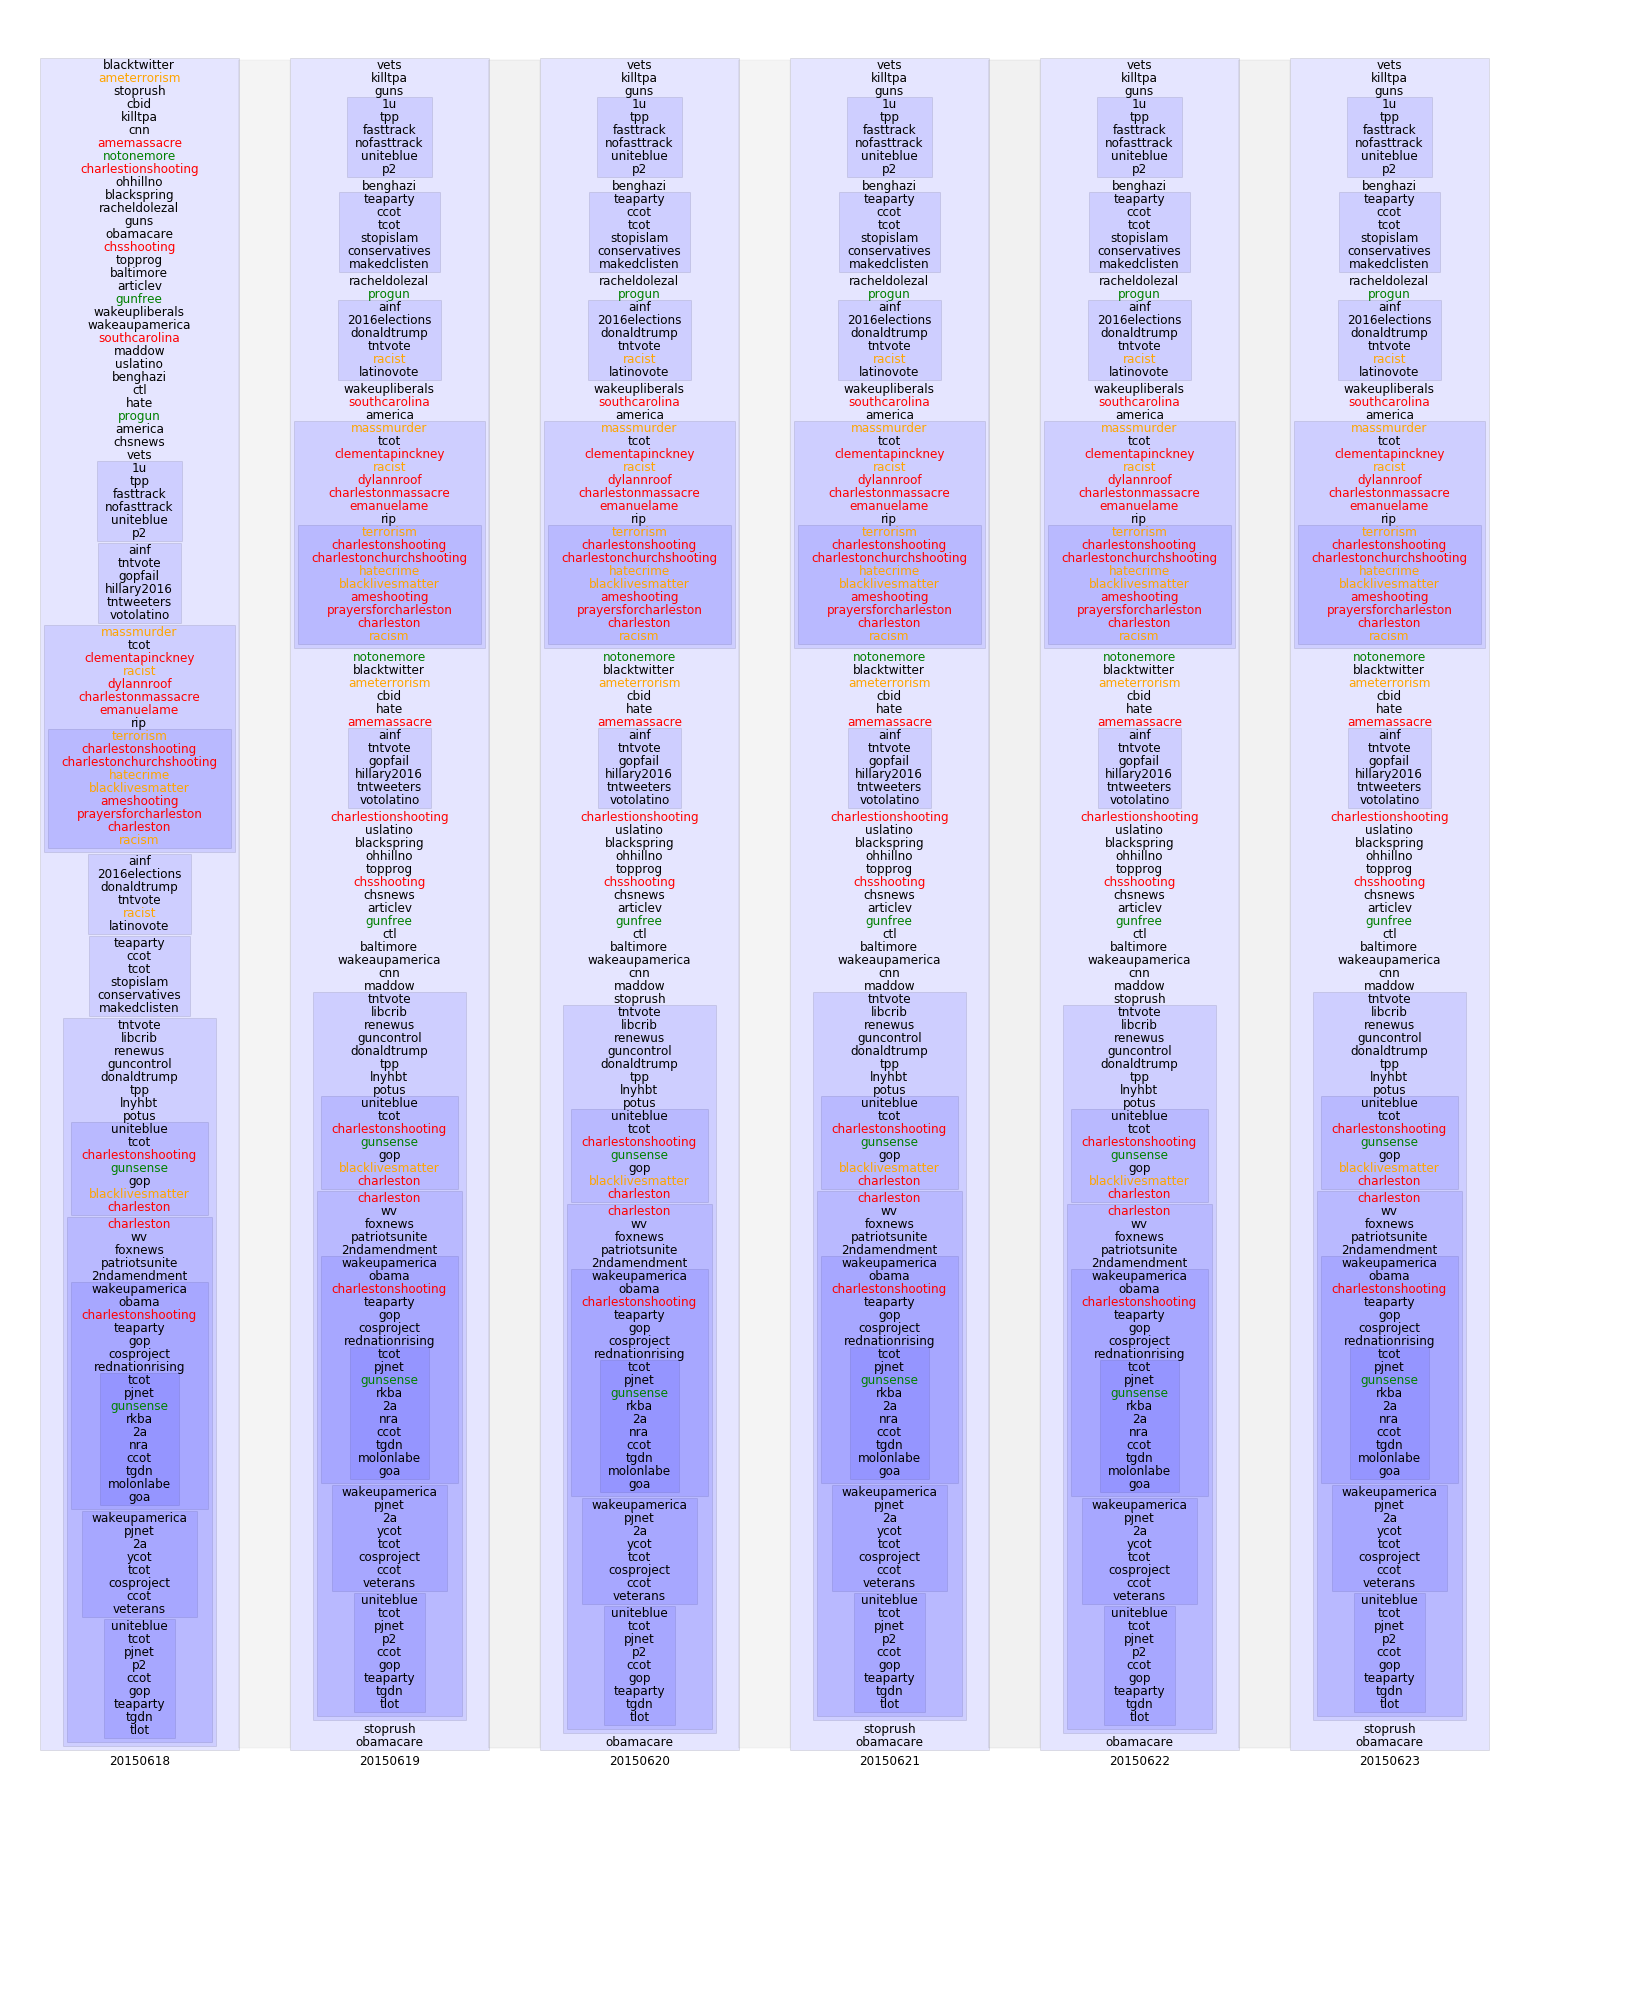

In [493]:
a = root.find('__20150618_8_2_70').k_parents[0].k_parents[0].k_parents[0]
days = 5
fig = homer.tree.draw_series(a, days, spacing=250, 
                             highlight_words={'charleston':'r', 
                                              'charlestonshooting':'r',
                                              'charlestonchurchshooting':'r',
                                              'charlestonmassacre':'r',
                                              'emanuelame':'r',
                                              'charlestionshooting':'r',
                                              'ameshooting':'r',
                                              'amemassacre':'r',
                                              'prayersforcharleston':'r',
                                              'dylanroof':'r',
                                              'chsshooting':'r',
                                              'dylannroof':'r',
                                              'southcarolina':'r',
                                              'clementapinckney':'r',
                                              'massmurder':'orange',
                                              'terror':'orange',
                                              'terrorist':'orange',
                                              'ameterrorism':'orange',
                                              'racist':'orange',
                                              'racism':'orange',
                                              'terrorism':'orange',
                                              'charlestonterrorist':'orange',
                                              'hatecrime':'orange',
                                              'blacklivesmatter':'orange',
                                              'alllivesmatter':'orange',
                                              'bluelivesmatter':'orange',
                                              'confederateflag':'orange',
                                              'whiteprivilege':'orange',
                                              'confederate':'orange',
                                              'racisminamerica':'orange',
                                              'charlestonstrong':'g',
                                              'takedowntheflag':'g',
                                              'takeitdown':'g',
                                              'iamame':'g',
                                              'notonemore':'g',
                                              'bridgetopeace':'g',
                                              'momsdemand':'g',
                                              '2ndammendment':'g',
                                              'gohomederay':'g',
                                              'standwithcharleston':'g',
                                              'secondamendment':'g',
                                              'takedownthatflag':'g',
                                              'unitychaincharleston':'g',
                                              'gunfreezone':'g',
                                              'gunfree':'g',
                                              'progun':'g',
                                              'ravenelbridge':'g',
                                              'gunrights':'g',
                                              'gunsense':'g'
                                             })
fig.savefig('/Users/houghton/Desktop/tw/hashtags_only/%s.png'%(repr(a)+str(days)))

In [374]:
a = fig.axes[0]
a.get_xbound()

(0.0, 1.0)

In [377]:
n = root.find('gunsense')
for p in n.k_parents:
    print(p, end='\t')
    for i in range(10):
        try:
            print(len(list(p.get_k_members())), end='\t')
            p = p.k_parents[0]
        except:
            print('')
            break

__20150616_5_2_585	6	8	10022	129227	
__20150616_9_2_54	11	22	29	63	3191	5845	10022	129227	
__20150617_5_2_456	6	6	9906	129227	
__20150617_8_2_48	11	40	69	155	5786	9906	129227	
__20150618_5_2_462	6	7	9369	129227	
__20150618_5_2_552	7	5298	9369	129227	
__20150618_6_2_183	7	7	5298	9369	129227	
__20150618_7_2_207	8	58	135	5298	9369	129227	
__20150618_9_2_78	11	18	42	58	135	5298	9369	129227	
__20150619_7_2_129	8	98	132	5897	9598	129227	
__20150619_8_2_143	9	58	98	132	5897	9598	129227	
__20150619_9_2_43	16	40	58	98	132	5897	9598	129227	
__20150620_11_2_10	12	13	17	21	31	56	99	5190	8944	129227	
__20150620_5_2_570	6	5190	8944	129227	
__20150620_7_2_125	8	8	8	8	8944	129227	
__20150621_7_2_40	20	22	107	5195	9083	129227	
__20150622_5_2_400	6	6	9884	129227	
__20150622_5_2_557	7	5741	9884	129227	
__20150622_6_2_216	7	178	5741	9884	129227	
__20150622_7_2_30	40	89	178	5741	9884	129227	
__20150623_8_2_60	12	37	78	153	5669	9697	129227	


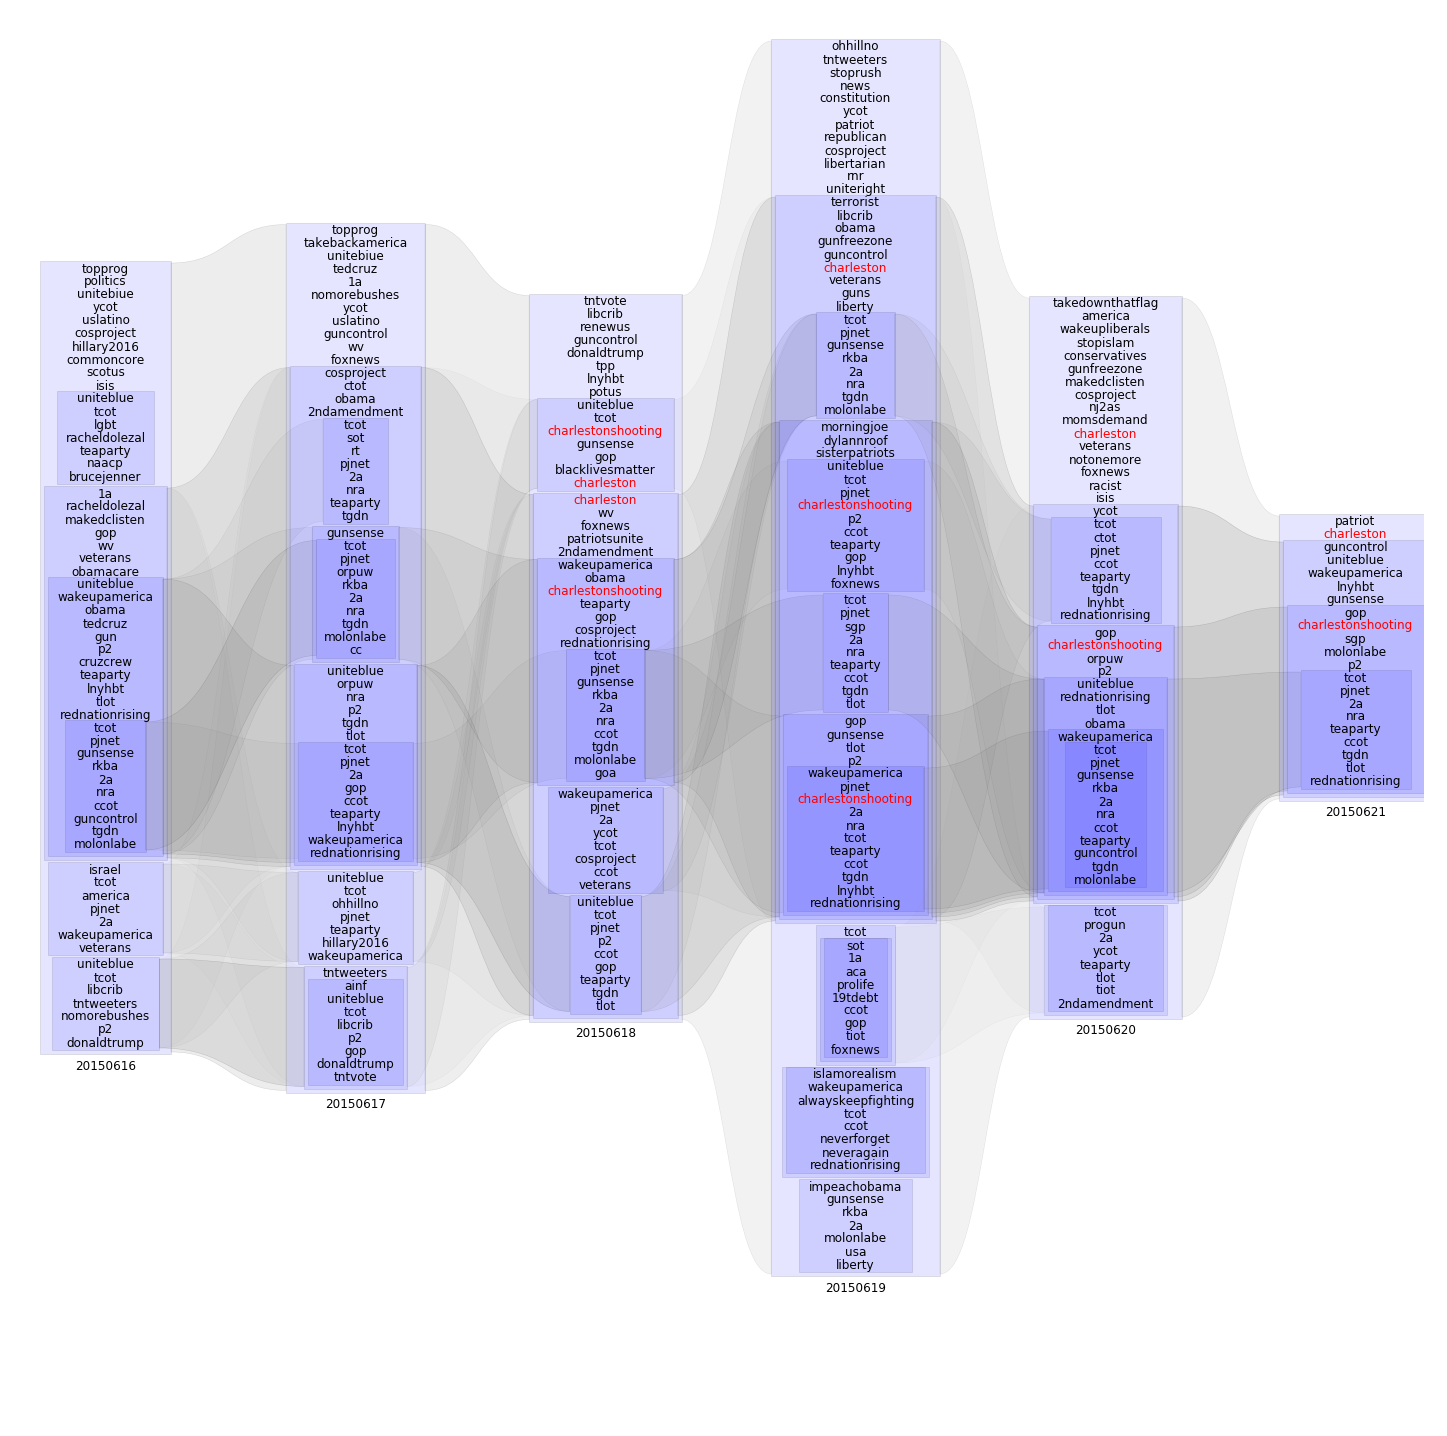

In [444]:
a = root.find('__20150616_9_2_54').k_parents[0].k_parents[0].k_parents[0]
fig = homer.tree.draw_series(a, 5, spacing=250, highlight_words={'charleston':'r', 'charlestonshooting':'r'})
fig.savefig('/Users/houghton/Desktop/tw/hashtags_only/%s.png'%repr(a), bbox_inches='tight', pad_inches=0.25)

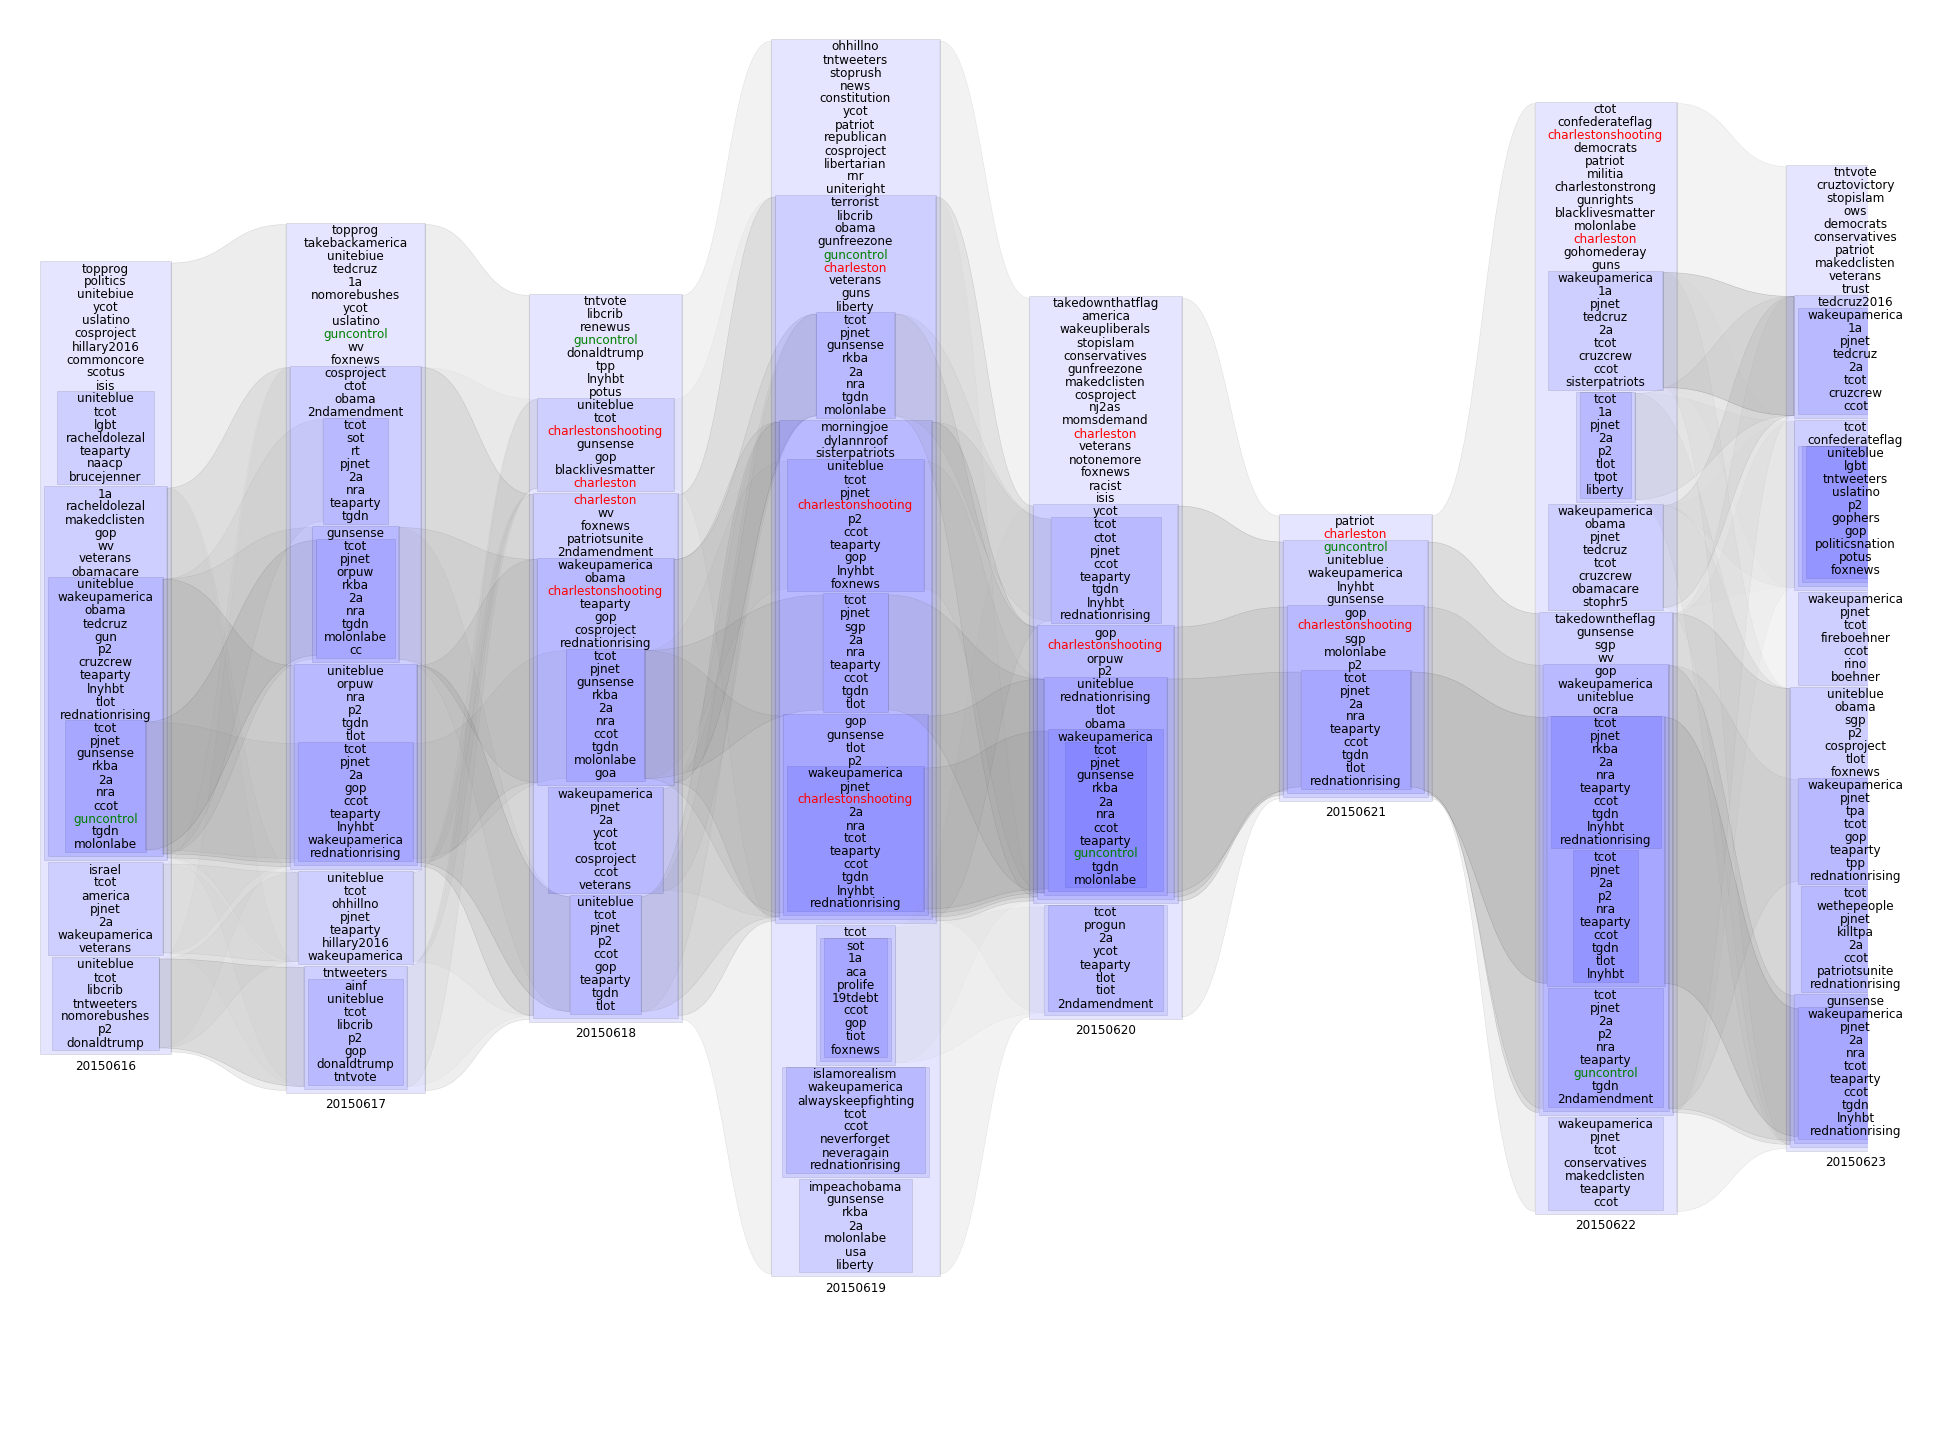

In [443]:
a = root.find('__20150616_9_2_54').k_parents[0].k_parents[0].k_parents[0]
fig = homer.tree.draw_series(a, 7, spacing=250, 
                             highlight_words={'charleston':'r', 'charlestonshooting':'r', 'guncontrol':'g'})
fig.savefig('/Users/houghton/Desktop/tw/hashtags_only/%s.png'%repr(a), bbox_inches='tight', pad_inches=0.25)

In [457]:
n = root.find('charleston')
for p in n.k_parents:
    print(p, end='\t')
    for i in range(10):
        try:
            print(len(list(p.get_k_members())), end='\t')
            p = p.k_parents[0]
        except:
            print('')
            break

__20150616_4_2_0	5845	10022	129227	
__20150617_5_2_0	3383	5786	9906	129227	
__20150618_3_2_764	4	129227	
__20150618_4_2_483	5	9369	129227	
__20150618_4_2_488	5	9369	129227	
__20150618_4_2_613	6	9369	129227	
__20150618_5_2_0	3118	5298	9369	129227	
__20150618_5_2_399	6	6	9369	129227	
__20150618_5_2_527	6	6	9369	129227	
__20150618_5_2_584	6	5298	9369	129227	
__20150618_5_2_587	6	5298	9369	129227	
__20150618_7_2_188	10	18	135	5298	9369	129227	
__20150618_7_2_207	8	58	135	5298	9369	129227	
__20150618_7_2_61	42	58	135	5298	9369	129227	
__20150619_3_2_910	4	129227	
__20150619_3_2_912	4	129227	
__20150619_3_2_913	4	129227	
__20150619_5_2_290	6	5897	9598	129227	
__20150619_5_2_492	6	5897	9598	129227	
__20150619_5_2_573	6	5897	9598	129227	
__20150619_6_2_345	10	23	5897	9598	129227	
__20150619_6_2_355	7	23	5897	9598	129227	
__20150619_7_2_33	58	98	132	5897	9598	129227	
__20150620_3_2_705	4	129227	
__20150620_3_2_711	4	129227	
__20150620_4_2_562	5	8944	129227	
__20150620_6_2_3	56	99	5190	8944	1292

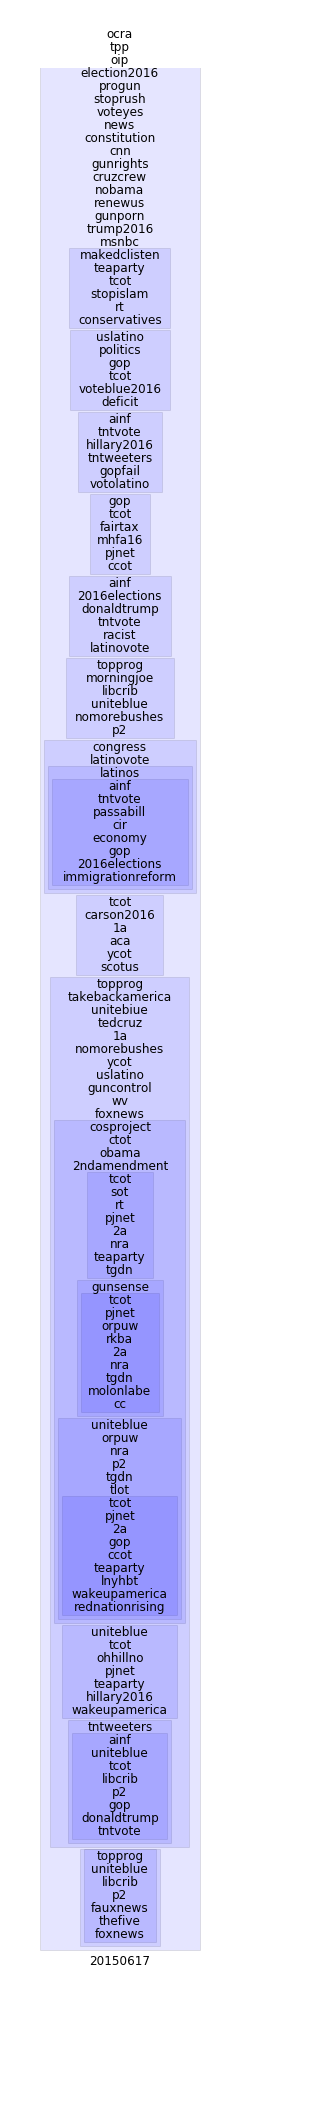

In [456]:
a = root.find('__20150617_6_2_234').k_parents[0]
fig = homer.tree.draw_series(a, 0, spacing=250, highlight_words={})